In [22]:
import keras
from keras import layers


In [23]:
encoding_dim = 32
input_img = keras.Input(shape=(784,))

In [24]:
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

In [25]:
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [26]:
autoencoder = keras.Model(input_img, decoded)

In [27]:
encoder = keras.Model(input_img, encoded)

In [28]:
encoded_input = keras.Input(shape=(encoding_dim,))

In [29]:
decoder_layer = autoencoder.layers[-1]

In [30]:
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [31]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [32]:
from keras.datasets import mnist
import numpy as np
(x_train,_),(x_test,_)=mnist.load_data()

In [33]:
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [34]:
autoencoder.fit(x_train,x_train,epochs=10,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/10
235/235 [==============================] - 4s 12ms/step - loss: 0.2808 - val_loss: 0.1920
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1719 - val_loss: 0.1543
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1447 - val_loss: 0.1344
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1286 - val_loss: 0.1203
Epoch 5/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1173 - val_loss: 0.1117
Epoch 6/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1100 - val_loss: 0.1057
Epoch 7/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1048 - val_loss: 0.1014
Epoch 8/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1012 - val_loss: 0.0985
Epoch 9/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0987 - val_loss: 0.0965
Epoch 10/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0971 - val_lo

In [35]:
encoded_imgs=encoder.predict(x_test)
decoded_imgs=decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 1ms/step


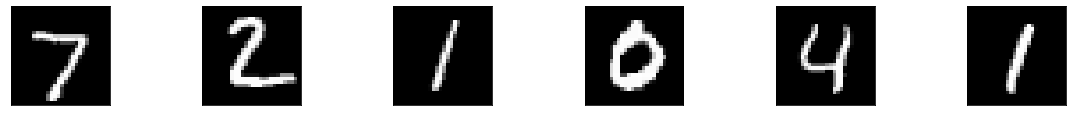

In [45]:
import matplotlib.pyplot as plt
n=6
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()